In [1]:
import pandas as pd
import gdown

import matplotlib.pyplot as plt

import io

In [2]:
url_songs = 'https://drive.google.com/file/d/1pp6AwVMt2ROIMX96YPqkdmyDmMxA2G6w/view?usp=sharing'
path_songs_id = url_songs.split('/')[-2]
path_songs = f"https://drive.google.com/uc?id={path_songs_id}"
gdown.download(path_songs, 'songs_clean_text.csv', quiet=False)

# songs_embedded_df = pd.read_csv(path_songs)
songs_full_df = pd.read_csv('songs_clean_text.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1pp6AwVMt2ROIMX96YPqkdmyDmMxA2G6w
From (redirected): https://drive.google.com/uc?id=1pp6AwVMt2ROIMX96YPqkdmyDmMxA2G6w&confirm=t&uuid=ffeb4b33-c224-42ba-bd12-b1842988c35c
To: /content/songs_clean_text.csv
100%|██████████| 1.36G/1.36G [00:18<00:00, 72.5MB/s]


In [3]:
songs_full_df

song_id                               Artists  \
0             0  Public Enemy,Ice Cube,Big Daddy Kane   
1             1                          Public Enemy   
2             2                          Public Enemy   
3             3                          Public Enemy   
4             4                         Fleetwood Mac   
...         ...                                   ...   
435850   450122                        Kenneth Ewards   
435851   450123                   Panic! At The Disco   
435852   450124   Measoon,Tryhan,Thuglack,Young Molly   
435853   450125                               Ymt Acp   
435854   450126                          LakeExplorer   

                              song  \
0              Burn Hollywood Burn   
1              Incident at 66.6 FM   
2       Brothers Gonna Work It Out   
3        Cant Do Nuttin For Ya Man   
4           In The Back Of My Mind   
...                            ...   
435850                Cold Blooded   
435851                       IDGAF   
435852                      Lakers   
435853                   Hard Trap   
435854   Lizzie Borden Took An Axe   

                                                     text  Length emotion  \
0       [Chuck D] Burn Hollywood burn I smell a riot G...     167   anger   
1       Flavor Flav: Yeah! It's the Flav, holmes, cold...      97   anger   
2       [Intro] “The rhythm, the rebel” “Don’t believe...     307     joy   
3       [Verse 1] Runnin' for your life, by the knife ...     166   anger   
4       Well I try and I try    You can't forget her  ...     422   anger   
...                                                   ...     ...     ...   
435850  [Intro] What it do Flight Crew FTC Flight Team...     192    fear   
435851  [Verse 1] You call me all friendly Tellin' me ...     208     joy   
435852  [Hook: Young Thug] She just wanna get this pap...     159     joy   
435853  [Intro] The separation of talent and skill is ...     161     joy   
435854  Lizzie Borden took an axe And gave her mother ...      80   anger   

                                         Genre  \
0                                      hip hop   
1                          rap,hip-hop,hip hop   
2                          rap,hip-hop,hip hop   
3                          rap,hip-hop,hip hop   
4       pop rock,classic rock,psychedelic rock   
...                                        ...   
435850                                    soul   
435851         alternative rock,emo,electropop   
435852                                 hip hop   
435853                                 hip hop   
435854                                 hip hop   

                                         Album Release_Date     Key  ...  \
0                       Fear Of A Black Planet   1990-04-10   D Maj  ...   
1                       Fear Of A Black Planet   1990-04-10  F# Maj  ...   
2                       Fear Of A Black Planet   1990-04-10   G Maj  ...   
3                       Fear Of A Black Planet   1990-04-10   E min  ...   
4                              Behind the Mask   1990-04-10   D Maj  ...   
...                                        ...          ...     ...  ...   
435850                       Flight Flow Vol 6   2023-09-09  D# min  ...   
435851  Indie - Rock & Pop - I.D.G.A.F. - Hits   2023-09-09   B min  ...   
435852                                  Lakers   2023-09-09   F min  ...   
435853                 Hard Living On The Road   2023-09-09   D Maj  ...   
435854                                 Borovik   2023-09-09   B Maj  ...   

        Similarity_Score_2                                   Similar_Artist_3  \
0                 0.969175                  Torren Foot,Tinie Tempah,L Devine   
1                 0.943620                                Rizván,N8TXU,LNGSLV   
2                 0.961616                                      Django Django   
3                 0.989446                                 DaBaby,Kodak Black   
4                 0.95

In [4]:
songs_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435855 entries, 0 to 435854
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   song_id                         435855 non-null  int64  
 1   Artists                         435855 non-null  object 
 2   song                            435855 non-null  object 
 3   text                            435855 non-null  object 
 4   Length                          435855 non-null  int64  
 5   emotion                         435855 non-null  object 
 6   Genre                           435855 non-null  object 
 7   Album                           435807 non-null  object 
 8   Release_Date                    435855 non-null  object 
 9   Key                             435855 non-null  object 
 10  Tempo                           435855 non-null  int64  
 11  Loudness_db                     435855 non-null  float64
 12  Time_signature  

In [5]:
# Converting 'Release_Date' back into datetime object:
songs_full_df['Release_Date'] = pd.to_datetime(songs_full_df['Release_Date'])

# Resample only works when the index is a date:
# songs_resampled_df = songs_full_df.set_index('Release_Date').resample('ME')['song_id'].count()
songs_resampled_df = songs_full_df.set_index('Release_Date').resample('ME')['song_id'].count().to_frame()

Calculate the total of songs released along the time horizon that we have defined for our project.

In [6]:
songs_resampled_df

song_id
Release_Date         
1990-01-31        627
1990-02-28         98
1990-03-31        276
1990-04-30        120
1990-05-31        105
...               ...
2024-04-30       1296
2024-05-31       1821
2024-06-30       1847
2024-07-31       8122
2024-08-31       6760

[416 rows x 1 columns]

In [7]:
songs_resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 1990-01-31 to 2024-08-31
Freq: ME
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   song_id  416 non-null    int64
dtypes: int64(1)
memory usage: 6.5 KB


In [8]:
# Resetear el índice para convertir Release_Date en columna
songs_resampled_df_count = songs_resampled_df.reset_index()

# Sumar todos los valores de la columna song_id
total_songs = songs_resampled_df_count['song_id'].sum()

In [9]:
total_songs

np.int64(435855)

Now we need to do the same, but only for the songs where at least one event was present.

In [10]:
songs_with_events_url = 'https://drive.google.com/file/d/1ItJYKFI8G0kg1XiqEZSQWKkkT7ak8Pcn/view?usp=sharing'
songs_with_events_id = songs_with_events_url.split('/')[-2]
path_song_with_events = f"https://drive.google.com/uc?id={songs_with_events_id}"
gdown.download(path_song_with_events, 'songs_with_events_df.csv', quiet=False)
songs_with_events_df = pd.read_csv('songs_with_events_df.csv')

Downloading...
From: https://drive.google.com/uc?id=1ItJYKFI8G0kg1XiqEZSQWKkkT7ak8Pcn
To: /content/songs_with_events_df.csv
100%|██████████| 1.84M/1.84M [00:00<00:00, 49.0MB/s]


In [11]:
songs_with_events_df

song_id  1413  1414  1431  1432  1433  1434  1451  1452  1453  ...  \
0           10     0     1     0     0     0     0     1     1     1  ...   
1           18     0     0     0     0     0     0     1     1     1  ...   
2           21     0     0     0     0     0     0     0     0     0  ...   
3           55     0     0     0     0     0     0     0     0     0  ...   
4          110     0     0     0     0     0     0     0     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
30222   450052     1     0     0     0     0     0     0     0     0  ...   
30223   450066     0     0     0     0     0     0     0     0     0  ...   
30224   450082     0     0     0     0     0     0     0     0     1  ...   
30225   450086     0     0     0     0     0     0     1     1     1  ...   
30226   450112     0     0     0     0     0     0     0     0     0  ...   

       192  193  194  196  200  201  202  203  2041  2042  
0        1    0    0    0    1    0    0    1     0     0  
1        0    0    0    0    1    0    1    0     0     0  
2        0    0    0    0    1    0    0    0     0     0  
3        0    0    0    0    0    0    1    0     0     0  
4        1    0    0    0    0    0    0    0     0     0  
...    ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  
30222    0    0    0    0    0    0    0    0     0     0  
30223    0    0    1    0    0    0    0    0     0     0  
30224    0    0    0    0    0    0    0    0     0     0  
30225    0    0    0    0    0    0    1    0     0     0  
30226    0    0    0    0    1    0    0    0     0     0  

[30227 rows x 28 columns]

Bringing back the Release_date column, to be able to do another resample:

In [12]:
songs_with_events_dated_df = songs_with_events_df.merge(
                                                        songs_full_df[['song_id','Release_Date']],
                                                        on = 'song_id',
                                                        how = 'left'
                                                        )

In [13]:
songs_with_events_dated_df

song_id  1413  1414  1431  1432  1433  1434  1451  1452  1453  ...  \
0           10     0     1     0     0     0     0     1     1     1  ...   
1           18     0     0     0     0     0     0     1     1     1  ...   
2           21     0     0     0     0     0     0     0     0     0  ...   
3           55     0     0     0     0     0     0     0     0     0  ...   
4          110     0     0     0     0     0     0     0     0     0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
30222   450052     1     0     0     0     0     0     0     0     0  ...   
30223   450066     0     0     0     0     0     0     0     0     0  ...   
30224   450082     0     0     0     0     0     0     0     0     1  ...   
30225   450086     0     0     0     0     0     0     1     1     1  ...   
30226   450112     0     0     0     0     0     0     0     0     0  ...   

       193  194  196  200  201  202  203  2041  2042  Release_Date  
0        0    0    0    1    0    0    1     0     0    1990-04-10  
1        0    0    0    1    0    1    0     0     0    1990-04-10  
2        0    0    0    1    0    0    0     0     0    1990-04-10  
3        0    0    0    0    0    1    0     0     0    1995-04-10  
4        0    0    0    0    0    0    0     0     0    2001-04-10  
...    ...  ...  ...  ...  ...  ...  ...   ...   ...           ...  
30222    0    0    0    0    0    0    0     0     0    2022-09-09  
30223    0    1    0    0    0    0    0     0     0    2022-09-09  
30224    0    0    0    0    0    0    0     0     0    2022-09-09  
30225    0    0    0    0    0    1    0     0     0    2022-09-09  
30226    0    0    0    1    0    0    0     0     0    2022-09-09  

[30227 rows x 29 columns]

In [14]:
# Asegurar formato datetime
songs_with_events_dated_df['Release_Date'] = pd.to_datetime(songs_with_events_dated_df['Release_Date'])

# Establecer Release_Date como índice
df_indexed = songs_with_events_dated_df.set_index('Release_Date')

# Seleccionar solo columnas de eventos (ignorando 'song_id')
event_cols = [col for col in df_indexed.columns if col != 'song_id']

# Resamplear por mes y contar cuántos song_id hay para cada evento (donde hay un 1)
songs_with_events_resampled_df = df_indexed[event_cols].resample('ME').apply(lambda x: (x == 1).sum())

In [15]:
songs_with_events_resampled_df

1413  1414  1431  1432  1433  1434  1451  1452  1453  1454  ...  \
Release_Date                                                              ...   
1990-01-31       5     2     2     0     4     2     8     5    10     6  ...   
1990-02-28       0     0     0     0     0     0     0     0     1     0  ...   
1990-03-31       5     4     0     0     2     0     6     7    11     5  ...   
1990-04-30       0     1     0     0     0     0     3     3     3     2  ...   
1990-05-31       0     0     0     0     0     0     2     1     3     0  ...   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
2024-04-30       6     0     1     0     2     1     4     5    20     8  ...   
2024-05-31      10     0     2     2     4     2    24    13    36    14  ...   
2024-06-30       7     2     1     1     9     3    24    12    42    15  ...   
2024-07-31      65    20    16    10    32    14   125    73   182    88  ...   
2024-08-31      55    17    22    13    42    19   121    83   205    89  ...   

              192  193  194  196  200  201  202  203  2041  2042  
Release_Date                                                      
1990-01-31      2    2    5    1   12    4   15    1     0     1  
1990-02-28      2    1    0    1    1    1    2    0     0     1  
1990-03-31      6    2    0    0    8    1    8    1     0     0  
1990-04-30      1    0    0    0    3    0    2    1     0     0  
1990-05-31      0    1    0    0    1    1    0    0     0     0  
...           ...  ...  ...  ...  ...  ...  ...  ...   ...   ...  
2024-04-30      9    4    4    0   22    4   20    4     1     0  
2024-05-31      8    5    2    3   37    5   39    4     2     1  
2024-06-30     11    4    3    2   46    9   33    2     0     3  
2024-07-31     50   31   21   10  223   46  204   18     1     9  
2024-08-31     64   43   15    7  212   63  200   22     0    14  

[416 rows x 27 columns]

In [16]:
# Copiar para evitar problemas posteriores
df_songs_with_events = songs_with_events_resampled_df.copy()
df_song_id = songs_resampled_df.copy()

# Convierte ambos índices a datetime, si no lo están ya
df_song_id.index = pd.to_datetime(df_song_id.index)
df_songs_with_events.index = pd.to_datetime(df_songs_with_events.index)

# Ordena los índices
df_song_id = df_song_id.sort_index()
df_songs_with_events = df_songs_with_events.sort_index()

# Reindexa df_events para que coincida con df_song_id
df_songs_with_events = df_songs_with_events.reindex(df_song_id.index)

# Ahora sí, usa los da
df_relative = df_songs_with_events.div(df_song_id['song_id'], axis=0)

print(df_relative.shape)
print(df_relative.head())

(416, 27)
                  1413      1414     1431  1432      1433     1434      1451  \
Release_Date                                                                   
1990-01-31    0.007974  0.003190  0.00319   0.0  0.006380  0.00319  0.012759   
1990-02-28    0.000000  0.000000  0.00000   0.0  0.000000  0.00000  0.000000   
1990-03-31    0.018116  0.014493  0.00000   0.0  0.007246  0.00000  0.021739   
1990-04-30    0.000000  0.008333  0.00000   0.0  0.000000  0.00000  0.025000   
1990-05-31    0.000000  0.000000  0.00000   0.0  0.000000  0.00000  0.019048   

                  1452      1453      1454  ...       192       193       194  \
Release_Date                                ...                                 
1990-01-31    0.007974  0.015949  0.009569  ...  0.003190  0.003190  0.007974   
1990-02-28    0.000000  0.010204  0.000000  ...  0.020408  0.010204  0.000000   
1990-03-31    0.025362  0.039855  0.018116  ...  0.021739  0.007246  0.000000   
1990-04-30    0.025000  

In [17]:
df_relative.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 1990-01-31 to 2024-08-31
Freq: ME
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1413    416 non-null    float64
 1   1414    416 non-null    float64
 2   1431    416 non-null    float64
 3   1432    416 non-null    float64
 4   1433    416 non-null    float64
 5   1434    416 non-null    float64
 6   1451    416 non-null    float64
 7   1452    416 non-null    float64
 8   1453    416 non-null    float64
 9   1454    416 non-null    float64
 10  161     416 non-null    float64
 11  163     416 non-null    float64
 12  174     416 non-null    float64
 13  175     416 non-null    float64
 14  176     416 non-null    float64
 15  190     416 non-null    float64
 16  191     416 non-null    float64
 17  192     416 non-null    float64
 18  193     416 non-null    float64
 19  194     416 non-null    float64
 20  196     416 non-null    float64
 21  200     416

In [18]:
df_relative_pct = df_relative * 100
df_relative_pct

1413      1414      1431      1432      1433      1434  \
Release_Date                                                               
1990-01-31    0.797448  0.318979  0.318979  0.000000  0.637959  0.318979   
1990-02-28    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1990-03-31    1.811594  1.449275  0.000000  0.000000  0.724638  0.000000   
1990-04-30    0.000000  0.833333  0.000000  0.000000  0.000000  0.000000   
1990-05-31    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...                ...       ...       ...       ...       ...       ...   
2024-04-30    0.462963  0.000000  0.077160  0.000000  0.154321  0.077160   
2024-05-31    0.549149  0.000000  0.109830  0.109830  0.219660  0.109830   
2024-06-30    0.378993  0.108284  0.054142  0.054142  0.487277  0.162426   
2024-07-31    0.800295  0.246245  0.196996  0.123122  0.393992  0.172371   
2024-08-31    0.813609  0.251479  0.325444  0.192308  0.621302  0.281065   

                  1451      1452      1453      1454  ...       192       193  \
Release_Date                                          ...                       
1990-01-31    1.275917  0.797448  1.594896  0.956938  ...  0.318979  0.318979   
1990-02-28    0.000000  0.000000  1.020408  0.000000  ...  2.040816  1.020408   
1990-03-31    2.173913  2.536232  3.985507  1.811594  ...  2.173913  0.724638   
1990-04-30    2.500000  2.500000  2.500000  1.666667  ...  0.833333  0.000000   
1990-05-31    1.904762  0.952381  2.857143  0.000000  ...  0.000000  0.952381   
...                ...       ...       ...       ...  ...       ...       ...   
2024-04-30    0.308642  0.385802  1.543210  0.617284  ...  0.694444  0.308642   
2024-05-31    1.317957  0.713893  1.976936  0.768808  ...  0.439319  0.274574   
2024-06-30    1.299404  0.649702  2.273958  0.812128  ...  0.595560  0.216567   
2024-07-31    1.539030  0.898793  2.240827  1.083477  ...  0.615612  0.381679   
2024-08-31    1.789941  1.227811  3.032544  1.316568  ...  0.946746  0.636095   

                   194       196       200       201       202       203  \
Release_Date                                                               
1990-01-31    0.797448  0.159490  1.913876  0.637959  2.392344  0.159490   
1990-02-28    0.000000  1.020408  1.020408  1.020408  2.040816  0.000000   
1990-03-31    0.000000  0.000000  2.898551  0.362319  2.898551  0.362319   
1990-04-30    0.000000  0.000000  2.500000  0.000000  1.666667  0.833333   
1990-05-31    0.000000  0.000000  0.952381  0.952381  0.000000  0.000000   
...                ...       ...       ...       ...       ...       ...   
2024-04-30    0.308642  0.000000  1.697531  0.308642  1.543210  0.308642   
2024-05-31    0.109830  0.164745  2.031851  0.274574  2.141680  0.219660   
2024-06-30    0.162426  0.108284  2.490525  0.487277  1.786681  0.108284   
2024-07-31    0.258557  0.123122  2.745629  0.566363  2.511697  0.221620   
2024-08-31    0.221893  0.103550  3.136095  0.931953  2.958580  0.325444   

                  2041      2042  
Release_Date                      
1990-01-31    0.000000  0.159490  
1990-02-28    0.000000  1.020408  
1990-03-31    0.000000  0.000000  
1990-04-30    0.000000  0.000000  
1990-05-31    0.000000  0.000000  
...                ...       ...  
2024-04-30    0.077160  0.000000  
2024-05-31    0.109830  0.054915  
2024-06-30    0.000000  0.162426  
2024-07-31    0.012312  0.110810  
2024-08-31    0.000000  0.207101  

[416 rows x 27 columns]

In [19]:
for col in df_relative_pct.columns:
    plt.figure(figsize=(12, 4))
    plt.plot(df_relative_pct.index, df_relative_pct[col], marker='o', linestyle='-')
    plt.title(f'Evolución temporal del evento {col}')
    plt.xlabel('Fecha')
    plt.ylabel('Porcentaje (%)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [20]:
# # TO SAVE EACH GRAPH
# for col in df_relative_pct.columns:
#     plt.figure(figsize=(12, 4))
#     plt.plot(df_relative_pct.index, df_relative_pct[col], marker='o', linestyle='-')
#     plt.title(f'Evolución temporal del evento {col}')
#     plt.xlabel('Fecha')
#     plt.ylabel('Porcentaje (%)')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.savefig(f'evento_{col}.png')
#     plt.close()

In [21]:
url_events_gdelt = 'https://drive.google.com/file/d/1hFhAQy2lucdIYBNSTL2fLR5syeT3utjw/view?usp=sharing'
path_gdelts_id = url_events_gdelt.split('/')[-2]
path_gdelt = f"https://drive.google.com/uc?id={path_gdelts_id}"
gdown.download(path_gdelt, 'gdelt_event_counts_1990_2024.csv', quiet=False)

# songs_embedded_df = pd.read_csv(path_songs)
gdelt_df = pd.read_csv('gdelt_event_counts_1990_2024.csv')

Downloading...
From: https://drive.google.com/uc?id=1hFhAQy2lucdIYBNSTL2fLR5syeT3utjw
To: /content/gdelt_event_counts_1990_2024.csv
100%|██████████| 92.6k/92.6k [00:00<00:00, 7.31MB/s]


In [22]:
gdelt_df['EventCode'].unique()

array([ 161,  163,  174,  175,  190,  191,  192,  193,  194,  201,  202,
       1431,  196,  203, 1413, 1414])

In [23]:
# Crea una columna de fecha para gdelt_df
gdelt_df['Date'] = pd.to_datetime(gdelt_df['Year'].astype(str) + '-' + gdelt_df['Month'].astype(str) + '-01')
# Ajusta al último día del mes, igual que df_relative
gdelt_df['Date'] = gdelt_df['Date'] + pd.offsets.MonthEnd(0)

gdelt_df['Date']

0      1990-01-31
1      1990-01-31
2      1990-01-31
3      1990-01-31
4      1990-01-31
          ...    
5954   2024-12-31
5955   2024-12-31
5956   2024-12-31
5957   2024-12-31
5958   2024-12-31
Name: Date, Length: 5959, dtype: datetime64[ns]

In [24]:
# Haz un dataframe pivoteado: filas=Release_Date, columnas=EventCode, valores=count
gdelt_pivot = gdelt_df.pivot_table(index='Date', columns='EventCode', values='count', aggfunc='sum')

gdelt_pivot

EventCode     161     163     174     175       190     191      192   \
Date                                                                    
1990-01-31   387.0   120.0   214.0    63.0    4622.0    83.0    630.0   
1990-02-28   250.0    66.0   177.0    96.0    3704.0    52.0    335.0   
1990-03-31   398.0   105.0   183.0    69.0    3965.0    67.0    374.0   
1990-04-30   252.0    85.0   220.0    52.0    3691.0    65.0    498.0   
1990-05-31   274.0   160.0   133.0    94.0    3917.0    58.0    302.0   
...            ...     ...     ...     ...       ...     ...      ...   
2024-08-31  3609.0  4416.0  5377.0  3839.0  164294.0  2313.0  19331.0   
2024-09-30  3043.0  6121.0  5171.0  2539.0  156734.0  1921.0  16630.0   
2024-10-31  4911.0  5140.0  7061.0  1988.0  175899.0  2317.0  18892.0   
2024-11-30  4063.0  4704.0  5044.0  2096.0  142885.0  1930.0  17135.0   
2024-12-31  4677.0  4960.0  5232.0  1812.0  141343.0  1952.0  21284.0   

EventCode      193      194    196   201     202     203   1413  1414  1431  
Date                                                                         
1990-01-31   1082.0    135.0    NaN   2.0    23.0     NaN   NaN   NaN   1.0  
1990-02-28    870.0    100.0    2.0   NaN     9.0     5.0   NaN   NaN   NaN  
1990-03-31   1001.0     72.0    4.0   5.0    23.0     NaN   NaN   NaN   NaN  
1990-04-30    992.0    110.0    NaN   NaN    21.0     NaN   NaN   NaN   NaN  
1990-05-31   1086.0    123.0    3.0   4.0    33.0     NaN   NaN   NaN   NaN  
...             ...      ...    ...   ...     ...     ...   ...   ...   ...  
2024-08-31  46587.0   9791.0   20.0  41.0   990.0   722.0   4.0   NaN   8.0  
2024-09-30  50089.0  12004.0   24.0  21.0  1188.0   949.0   3.0   6.0   4.0  
2024-10-31  46563.0  19811.0   30.0  62.0  1499.0  1056.0  71.0   1.0   9.0  
2024-11-30  37690.0  11996.0  163.0  30.0   715.0  1080.0   1.0   4.0   3.0  
2024-12-31  43090.0   7110.0  575.0  48.0   803.0  1057.0  17.0   NaN   1.0  

[420 rows x 16 columns]

In [25]:
print("Columnas df_relative_pct:", df_relative_pct.columns)
print("Columnas gdelt_pivot:", gdelt_pivot.columns)

Columnas df_relative_pct: Index(['1413', '1414', '1431', '1432', '1433', '1434', '1451', '1452', '1453',
       '1454', '161', '163', '174', '175', '176', '190', '191', '192', '193',
       '194', '196', '200', '201', '202', '203', '2041', '2042'],
      dtype='object')
Columnas gdelt_pivot: Index([ 161,  163,  174,  175,  190,  191,  192,  193,  194,  196,  201,  202,
        203, 1413, 1414, 1431],
      dtype='int64', name='EventCode')


In [26]:
gdelt_pivot.columns = gdelt_pivot.columns.astype(str)

In [27]:
for col in df_relative.columns:
    fig, ax = plt.subplots(figsize=(12, 4))
    # Línea de tu dataframe original (porcentaje)
    # ax.plot(df_relative.index, df_relative[col]*100, label='Porcentaje (df_relative)', color='blue')
    ax.plot(df_relative_pct.index, df_relative_pct[col], label='Porcentaje (df_relative)', color='blue')
    # Línea de gdelt (conteo absoluto)
    if col in gdelt_pivot.columns:
        ax.plot(gdelt_pivot.index, gdelt_pivot[col], label='Conteo (gdelt_df)', color='orange')
    ax.set_title(f'Evolución temporal del evento {col}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Porcentaje / Conteo')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
for col in df_relative.columns:
    fig, ax1 = plt.subplots(figsize=(12, 4))
    # Línea de tu dataframe original (porcentaje)
    ax1.plot(df_relative_pct.index, df_relative_pct[col], label='Porcentaje (df_relative_pct)', color='blue')
    ax1.set_ylabel('Porcentaje', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Línea de gdelt (conteo absoluto) en un segundo eje y
    ax2 = ax1.twinx()
    if col in gdelt_pivot.columns:
        ax2.plot(gdelt_pivot.index, gdelt_pivot[col], label='Conteo (gdelt_df)', color='orange')
    ax2.set_ylabel('Conteo', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Títulos y formato
    ax1.set_title(f'Evolución temporal del evento {col}')
    ax1.set_xlabel('Fecha')
    ax1.grid(True, alpha=0.3)
    fig.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [29]:
# Extraer los dos primeros dígitos de cada columna (siempre son strings)
groups = set(col[:2] for col in df_relative.columns)

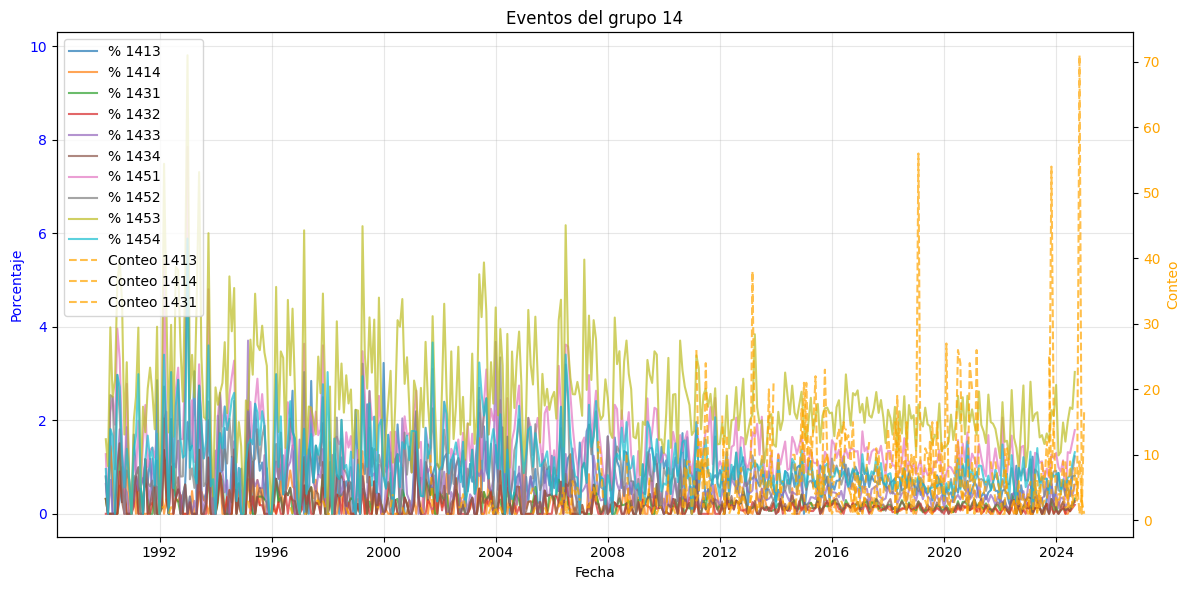

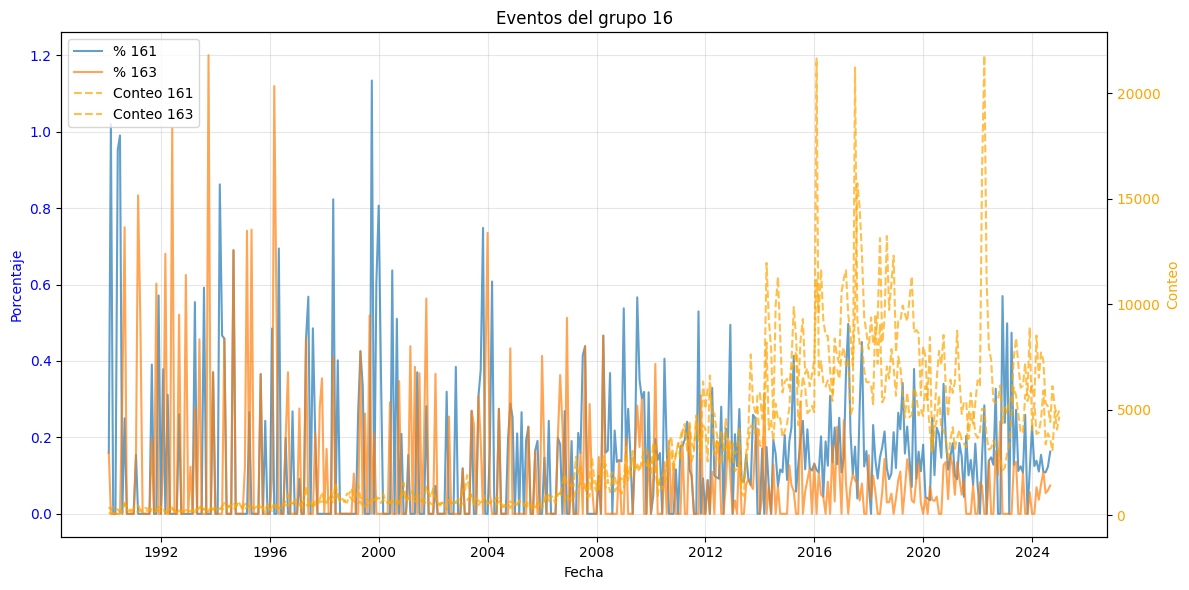

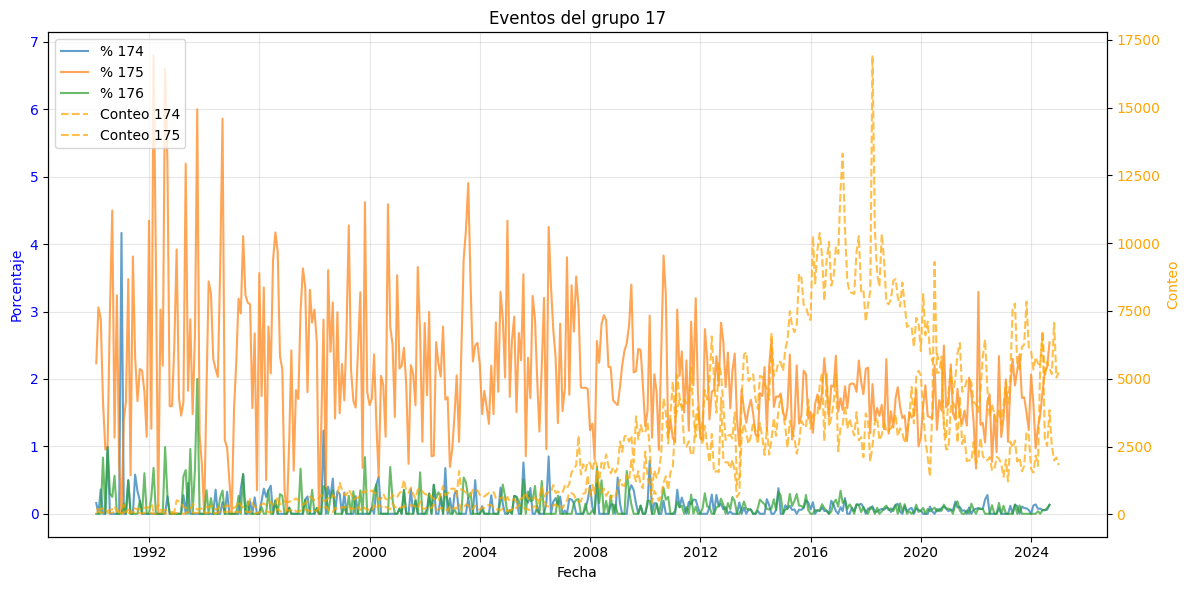

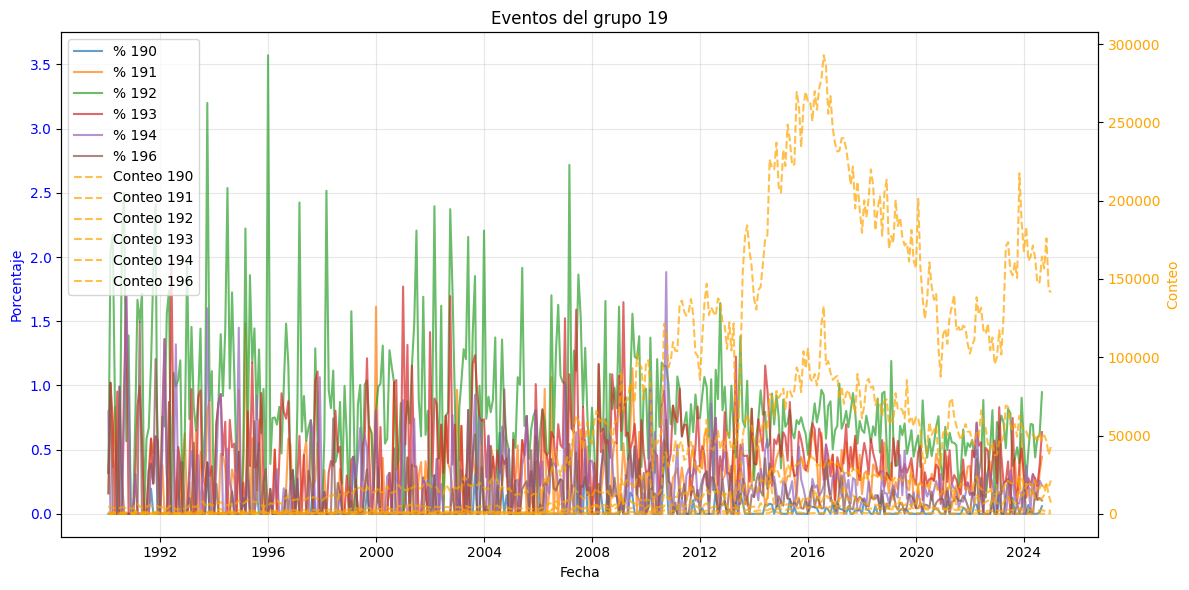

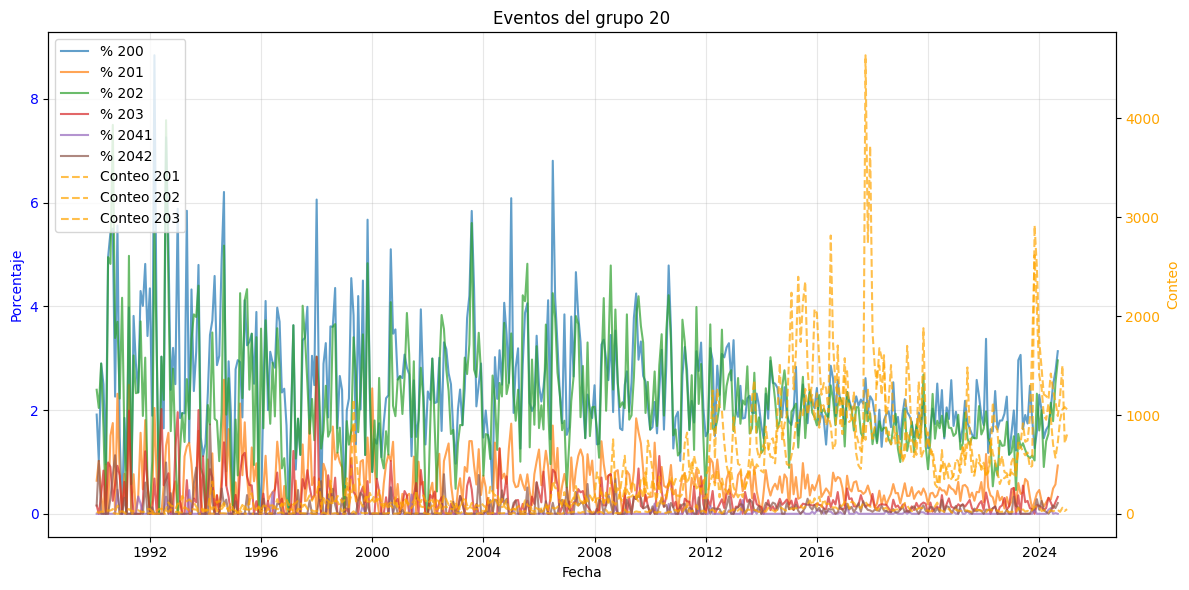

In [30]:
for group in sorted(groups):
    # Filtrar columnas que empiezan por el grupo
    cols_group = [col for col in df_relative.columns if col.startswith(group)]
    if not cols_group:
        continue

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Graficar cada serie de porcentajes (df_relative_pct)
    for col in cols_group:
        ax1.plot(df_relative_pct.index, df_relative_pct[col], label=f'% {col}', alpha=0.7)

    ax1.set_ylabel('Porcentaje', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Graficar cada serie de conteo (gdelt_pivot), si existe
    ax2 = ax1.twinx()
    for col in cols_group:
        if col in gdelt_pivot.columns:
            ax2.plot(gdelt_pivot.index, gdelt_pivot[col], label=f'Conteo {col}', color='orange', alpha=0.7, linestyle='--')

    ax2.set_ylabel('Conteo', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax1.set_title(f'Eventos del grupo {group}')
    ax1.set_xlabel('Fecha')
    ax1.grid(True, alpha=0.3)

    # Mejorar la leyenda para distinguir porcentajes y conteos
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.tight_layout()
    plt.show()


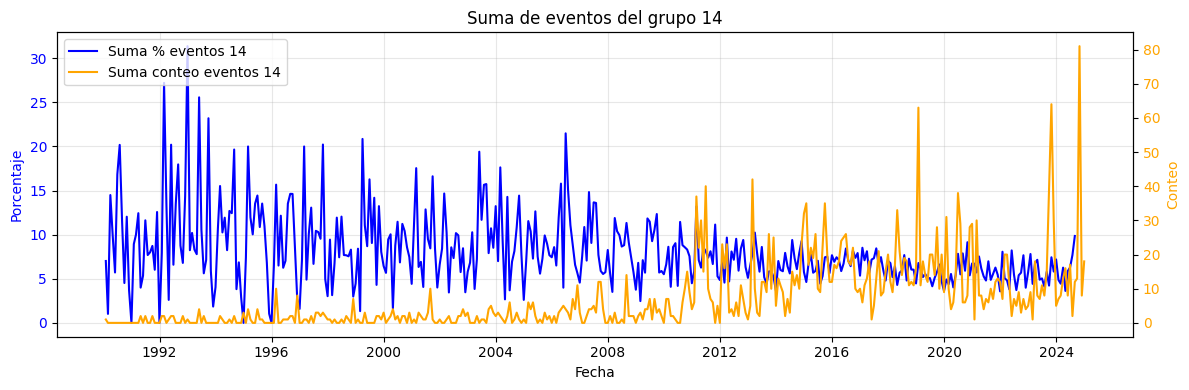

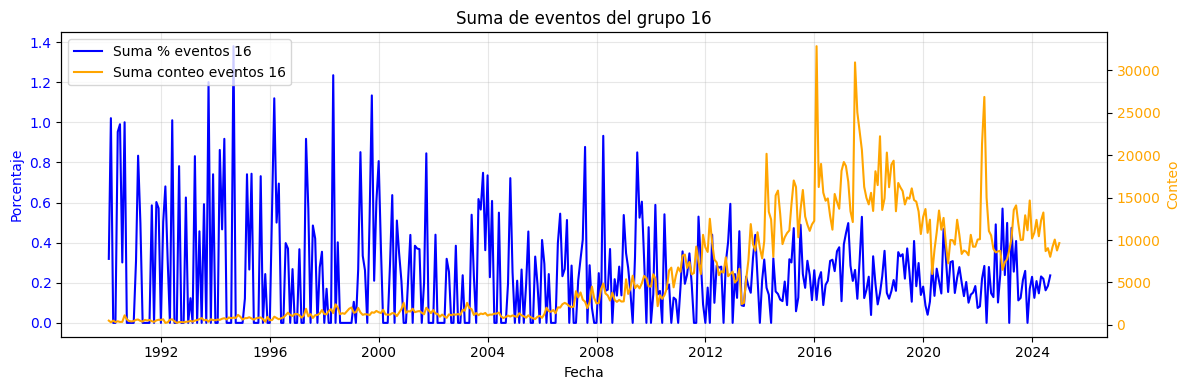

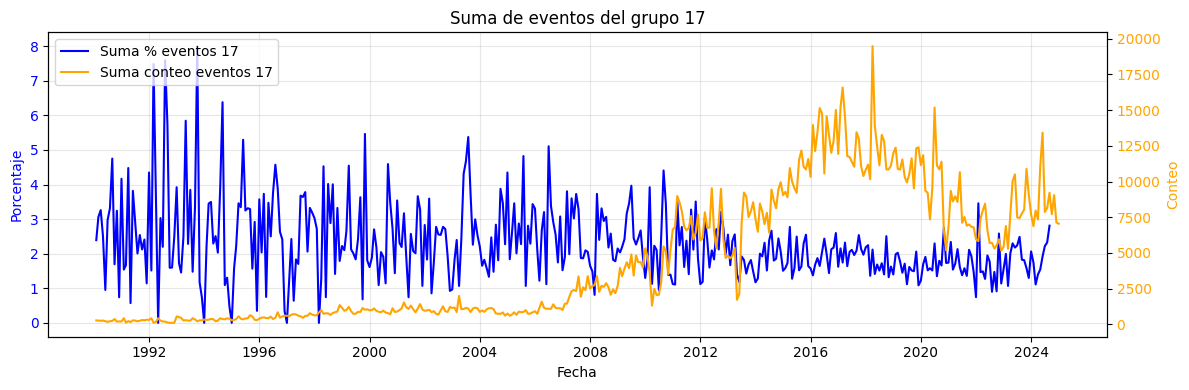

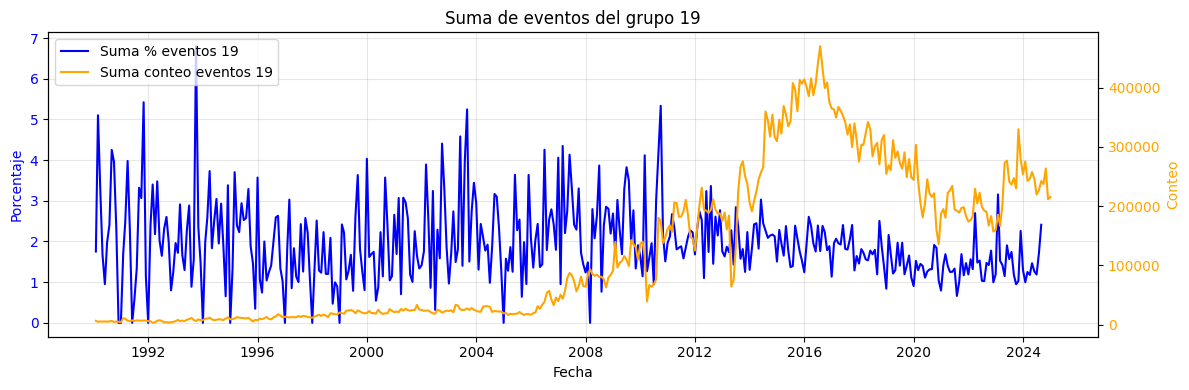

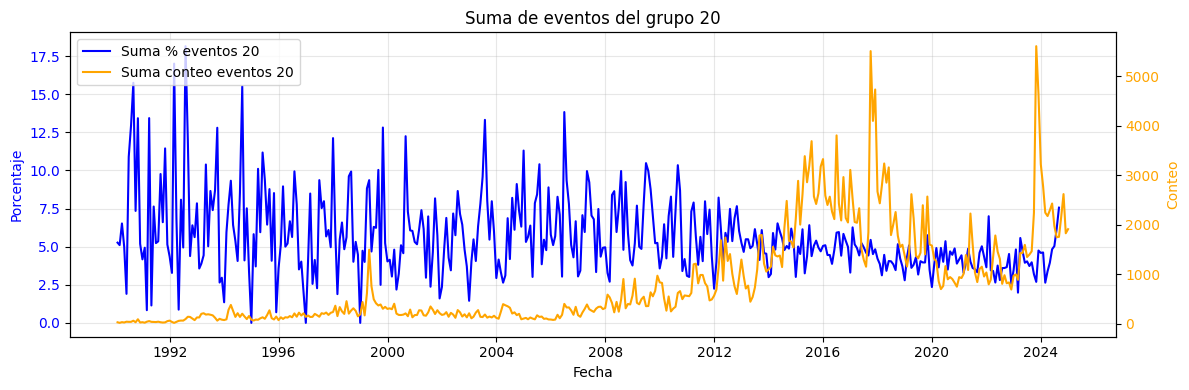

In [31]:
for group in sorted(groups):
    # Filtrar columnas que empiezan por el grupo
    cols_group_pct = [col for col in df_relative_pct.columns if col.startswith(group)]
    cols_group_gdelt = [col for col in gdelt_pivot.columns if col.startswith(group)]

    # Sumar porcentajes para el grupo
    sum_pct = df_relative_pct[cols_group_pct].sum(axis=1)

    # Sumar conteos para el grupo (si hay columnas en gdelt_pivot)
    sum_gdelt = pd.Series(0, index=gdelt_pivot.index)
    if cols_group_gdelt:
        sum_gdelt = gdelt_pivot[cols_group_gdelt].sum(axis=1)

    # Graficar
    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.plot(sum_pct.index, sum_pct, label=f'Suma % eventos {group}', color='blue')
    ax1.set_ylabel('Porcentaje', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(sum_gdelt.index, sum_gdelt, label=f'Suma conteo eventos {group}', color='orange')
    ax2.set_ylabel('Conteo', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax1.set_title(f'Suma de eventos del grupo {group}')
    ax1.set_xlabel('Fecha')
    ax1.grid(True, alpha=0.3)

    # Mejorar la leyenda para distinguir porcentajes y conteos
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.tight_layout()
    plt.show()


In [32]:
event_clusters = """
Code,Description
14,Protest
16,Reduce Relations
17,Coerce
19,Fight
20,Use Unconventional Mass Violence
"""

# Convertir el string en DataFrame y luego en diccionario
df_clusters = pd.read_csv(io.StringIO(event_clusters))
cluster_dict = dict(zip(df_clusters['Code'].astype(str), df_clusters['Description']))

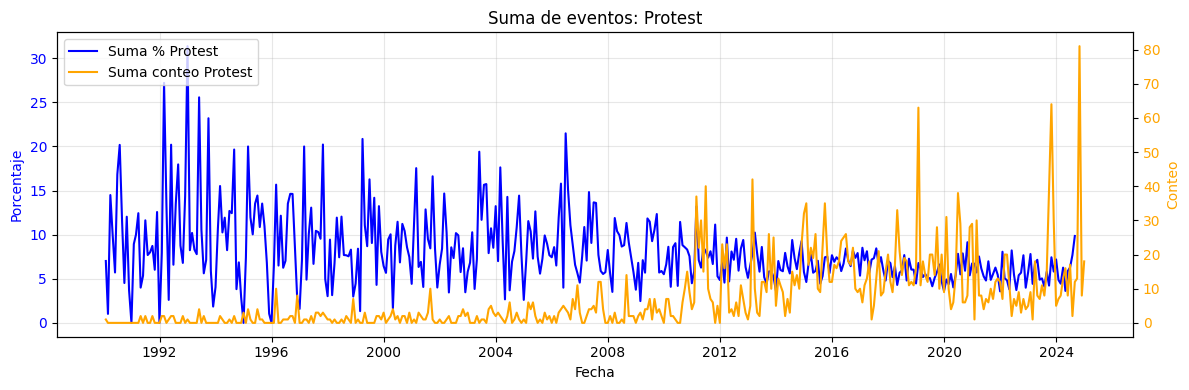

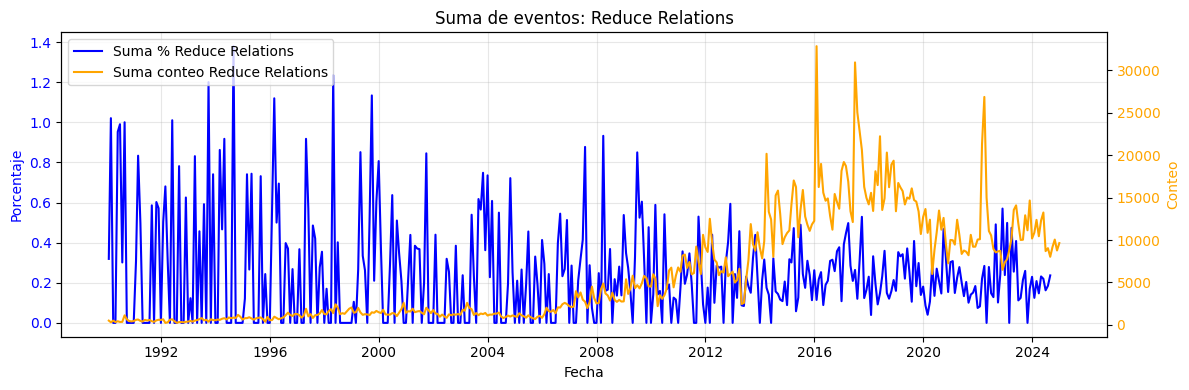

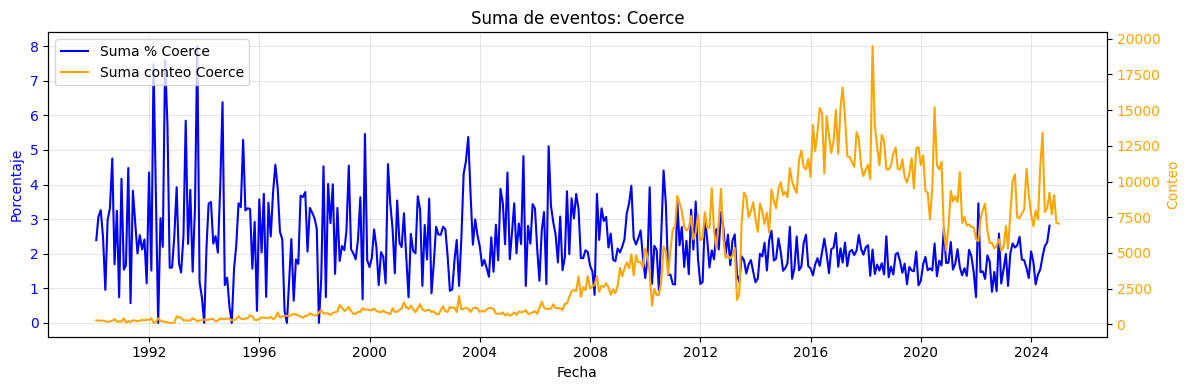

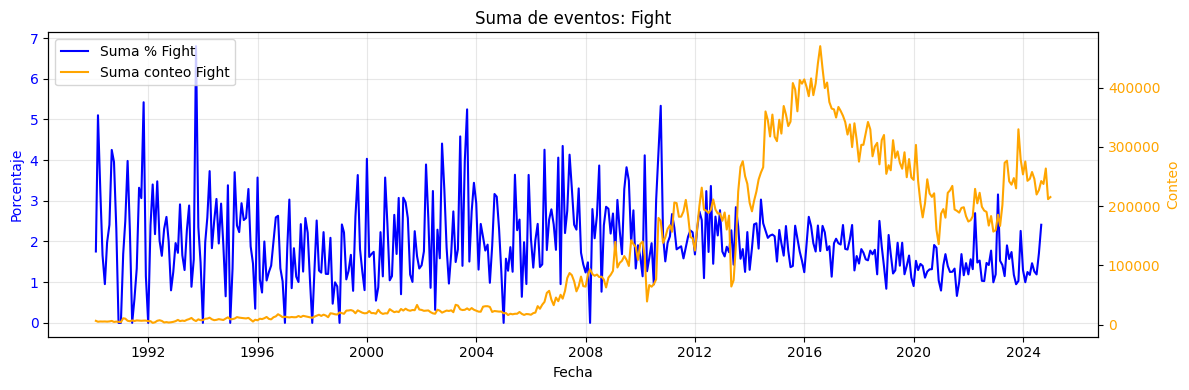

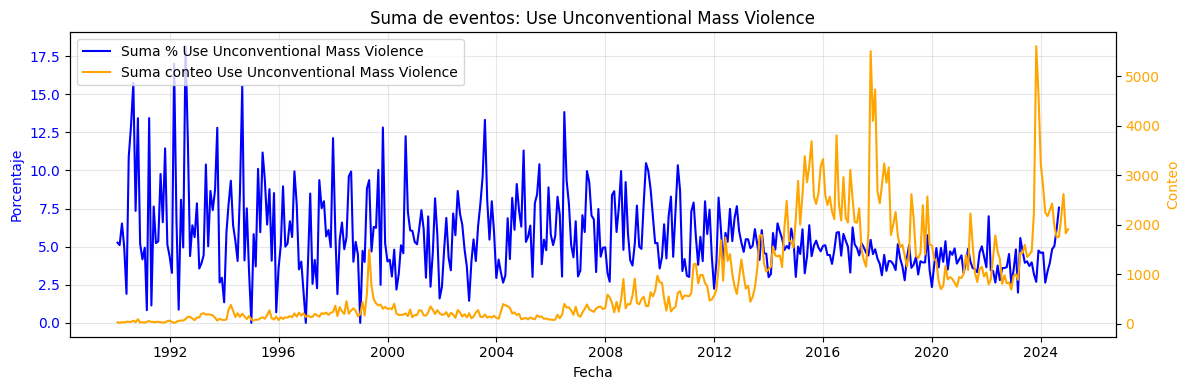

In [33]:
for group in sorted(groups):
    # Obtener la descripción del grupo (si no existe, usar el código)
    description = cluster_dict.get(group, group)

    cols_group_pct = [col for col in df_relative_pct.columns if col.startswith(group)]
    cols_group_gdelt = [col for col in gdelt_pivot.columns if col.startswith(group)]

    sum_pct = df_relative_pct[cols_group_pct].sum(axis=1)
    sum_gdelt = pd.Series(0, index=gdelt_pivot.index)
    if cols_group_gdelt:
        sum_gdelt = gdelt_pivot[cols_group_gdelt].sum(axis=1)

    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.plot(sum_pct.index, sum_pct, label=f'Suma % {description}', color='blue')
    ax1.set_ylabel('Porcentaje', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(sum_gdelt.index, sum_gdelt, label=f'Suma conteo {description}', color='orange')
    ax2.set_ylabel('Conteo', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    ax1.set_title(f'Suma de eventos: {description}')
    ax1.set_xlabel('Fecha')
    ax1.grid(True, alpha=0.3)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.tight_layout()
    plt.show()

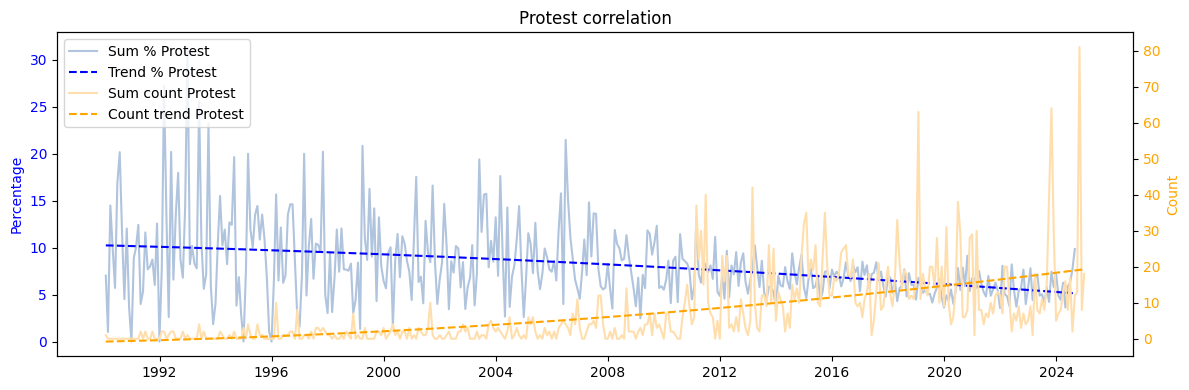

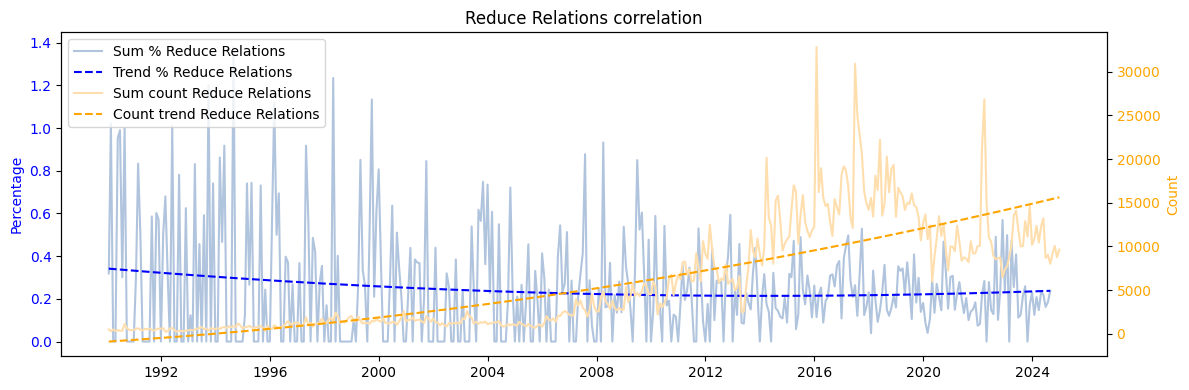

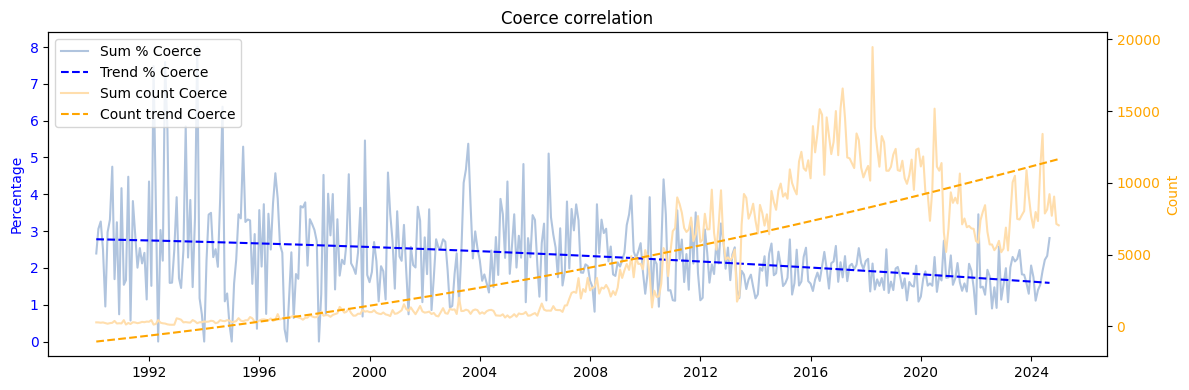

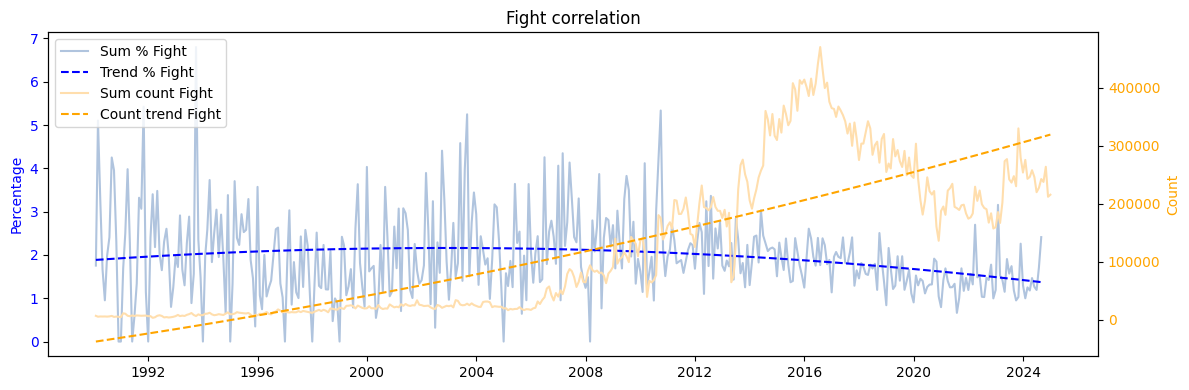

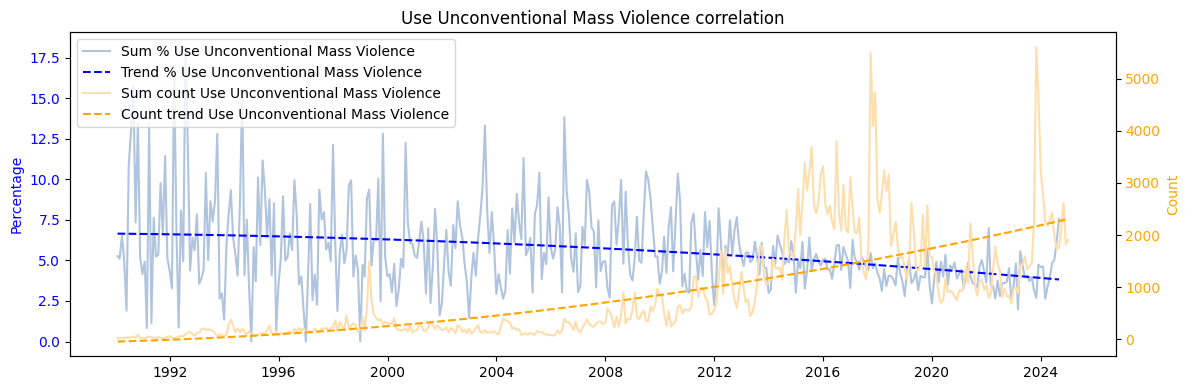

In [34]:
import numpy as np

color_gdelt_sum = 'navajowhite'
color_gdelt_tendence = 'orange'
color_lyrics_sum = 'lightsteelblue'
color_lyrics_tendence = 'blue'
color_gdelt_axis = color_gdelt_tendence
color_lyrics_axis = color_lyrics_tendence

tendencia=2

for group in sorted(groups):
    # Obtener la descripción del grupo (si no existe, usar el código)
    description = cluster_dict.get(group, group)

    cols_group_pct = [col for col in df_relative_pct.columns if col.startswith(group)]
    cols_group_gdelt = [col for col in gdelt_pivot.columns if col.startswith(group)]

    sum_pct = df_relative_pct[cols_group_pct].sum(axis=1)
    sum_gdelt = pd.Series(0, index=gdelt_pivot.index)
    if cols_group_gdelt:
        sum_gdelt = gdelt_pivot[cols_group_gdelt].sum(axis=1)

    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.plot(sum_pct.index, sum_pct, label=f'Sum % {description}', color=color_lyrics_sum)
    ax1.set_ylabel('Percentage', color=color_lyrics_axis)
    ax1.tick_params(axis='y', labelcolor=color_lyrics_axis)

    ax2 = ax1.twinx()
    ax2.plot(sum_gdelt.index, sum_gdelt, label=f'Sum count {description}', color=color_gdelt_sum)
    ax2.set_ylabel('Count', color=color_gdelt_axis)
    ax2.tick_params(axis='y', labelcolor=color_gdelt_axis)

    # Convertir fechas a días desde el inicio (para poder ajustar la línea de tendencia)
    x_pct = (sum_pct.index - sum_pct.index[0]).days.values
    x_gdelt = (sum_gdelt.index - sum_gdelt.index[0]).days.values

    # Ajustar línea de tendencia para la serie azul (sum_pct)
    z_pct = np.polyfit(x_pct, sum_pct.values, tendencia)
    p_pct = np.poly1d(z_pct)
    ax1.plot(sum_pct.index, p_pct(x_pct), linestyle='--', color=color_lyrics_tendence, label=f'Trend % {description}')

    # Ajustar línea de tendencia para la serie naranja (sum_gdelt)
    if len(sum_gdelt) > 0:  # Solo si hay datos
        z_gdelt = np.polyfit(x_gdelt, sum_gdelt.values, tendencia)
        p_gdelt = np.poly1d(z_gdelt)
        ax2.plot(sum_gdelt.index, p_gdelt(x_gdelt), linestyle='--', color=color_gdelt_tendence, label=f'Count trend {description}')

    ax1.set_title(f'{description} correlation')
    # ax1.set_xlabel('Date')
    # ax1.grid(True, alpha=0.3)
    ax1.grid(False)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    fig.tight_layout()
    plt.show()

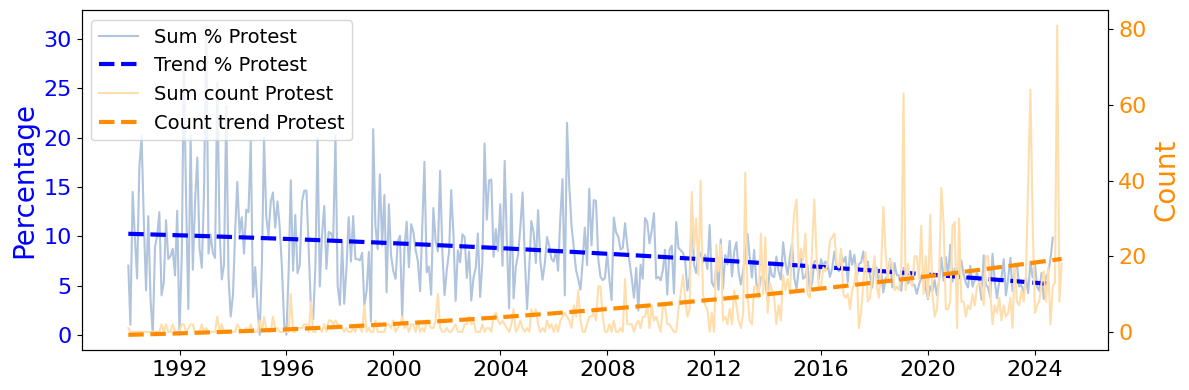

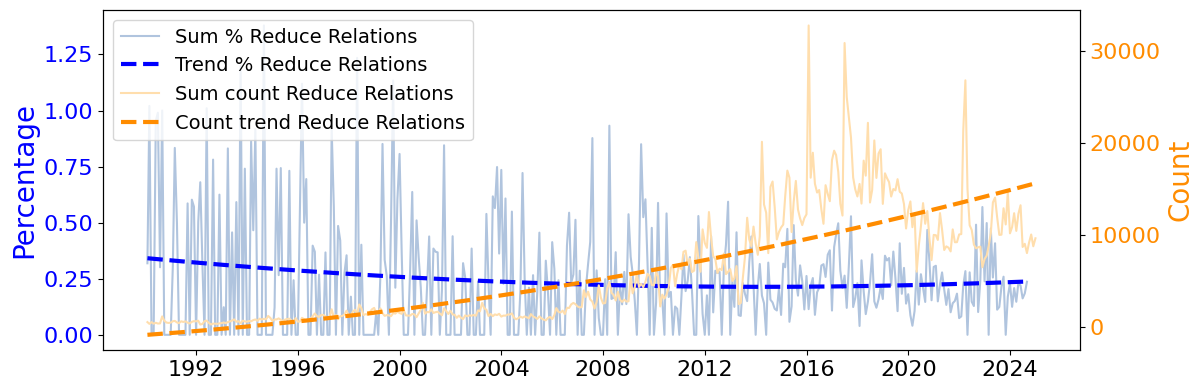

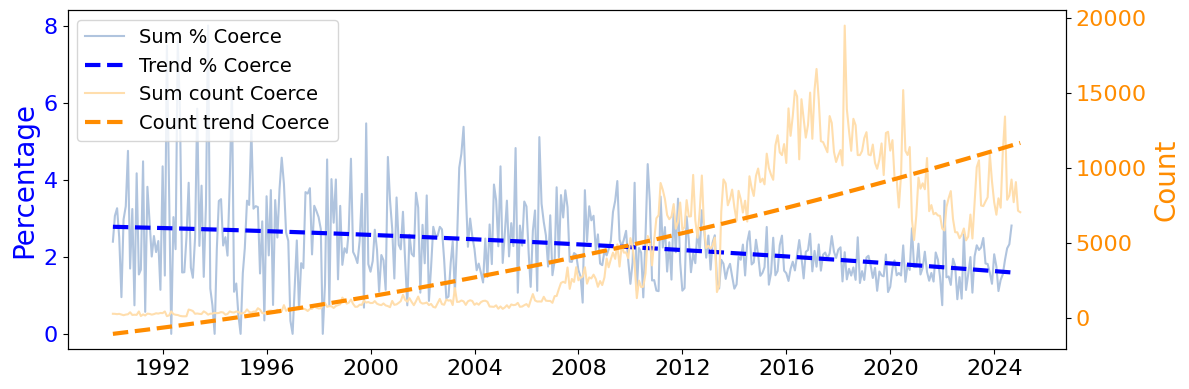

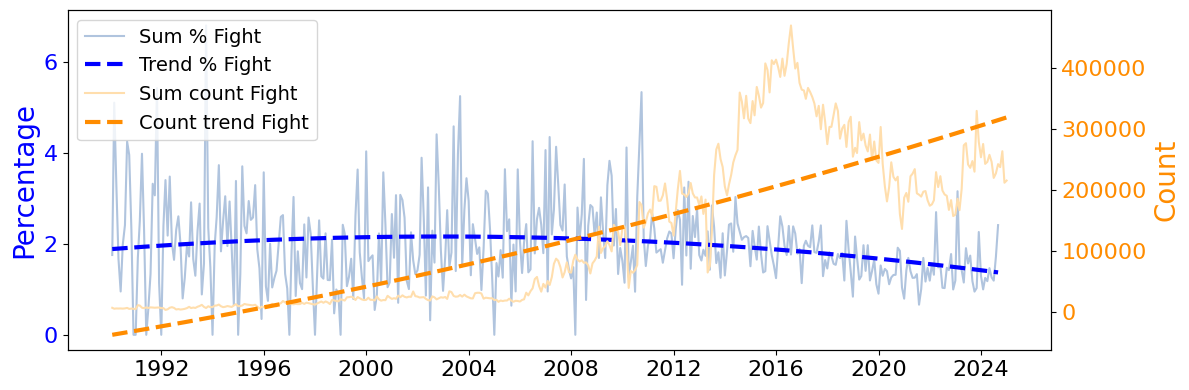

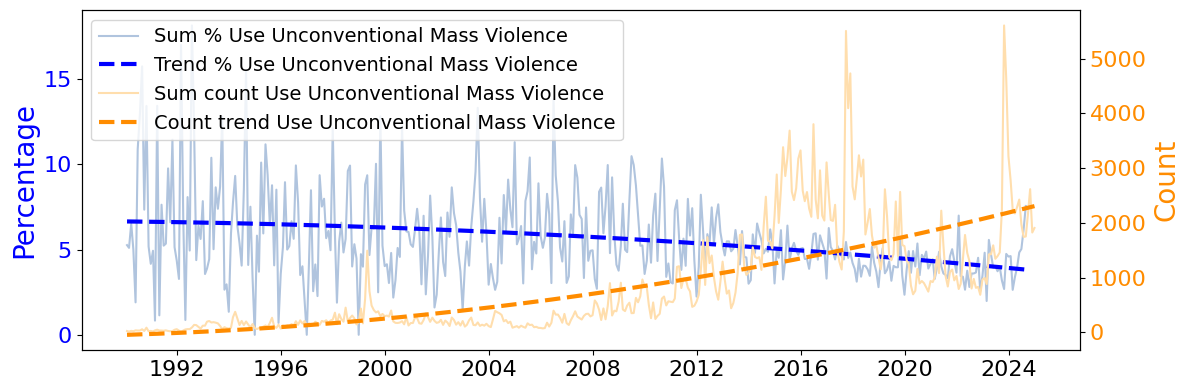

In [46]:
color_gdelt_sum = 'navajowhite'
color_gdelt_tendence = 'darkorange'
color_lyrics_sum = 'lightsteelblue'
color_lyrics_tendence = 'blue'
color_gdelt_axis = color_gdelt_tendence
color_lyrics_axis = color_lyrics_tendence

title_size = 18
label_size = 20
legend_size = 14
tick_size = 16
trend_thickness = 3

tendencia=2

for group in sorted(groups):
    # Obtener la descripción del grupo (si no existe, usar el código)
    description = cluster_dict.get(group, group)

    cols_group_pct = [col for col in df_relative_pct.columns if col.startswith(group)]
    cols_group_gdelt = [col for col in gdelt_pivot.columns if col.startswith(group)]

    sum_pct = df_relative_pct[cols_group_pct].sum(axis=1)
    sum_gdelt = pd.Series(0, index=gdelt_pivot.index)
    if cols_group_gdelt:
        sum_gdelt = gdelt_pivot[cols_group_gdelt].sum(axis=1)

    fig, ax1 = plt.subplots(figsize=(12, 4))
    ax1.plot(sum_pct.index, sum_pct, label=f'Sum % {description}', color=color_lyrics_sum)
    ax1.set_ylabel('Percentage', fontsize=label_size, color=color_lyrics_axis)
    ax1.tick_params(axis='y', labelcolor=color_lyrics_axis, labelsize=tick_size)

    ax1.tick_params(axis='x', labelsize=tick_size)

    ax2 = ax1.twinx()
    ax2.plot(sum_gdelt.index, sum_gdelt, label=f'Sum count {description}', color=color_gdelt_sum)
    ax2.set_ylabel('Count', fontsize=label_size, color=color_gdelt_axis)
    ax2.tick_params(axis='y', labelcolor=color_gdelt_axis, labelsize=tick_size)

    # Convertir fechas a días desde el inicio (para poder ajustar la línea de tendencia)
    x_pct = (sum_pct.index - sum_pct.index[0]).days.values
    x_gdelt = (sum_gdelt.index - sum_gdelt.index[0]).days.values

    # Ajustar línea de tendencia para la serie azul (sum_pct)
    z_pct = np.polyfit(x_pct, sum_pct.values, tendencia)
    p_pct = np.poly1d(z_pct)
    ax1.plot(sum_pct.index, p_pct(x_pct), linestyle='--', color=color_lyrics_tendence, label=f'Trend % {description}', linewidth=trend_thickness)

    # Ajustar línea de tendencia para la serie naranja (sum_gdelt)
    if len(sum_gdelt) > 0:  # Solo si hay datos
        z_gdelt = np.polyfit(x_gdelt, sum_gdelt.values, tendencia)
        p_gdelt = np.poly1d(z_gdelt)
        ax2.plot(sum_gdelt.index, p_gdelt(x_gdelt), linestyle='--', color=color_gdelt_tendence, label=f'Count trend {description}', linewidth=trend_thickness)

    # ax1.set_title(f'{description} correlation', fontsize=title_size)
    # ax1.set_xlabel('Date', fontsize=label_size)
    # ax1.grid(True, alpha=0.3)
    ax1.grid(False)

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', prop={'size': legend_size})

    fig.tight_layout()
    plt.show()